In [13]:
import os

from env_setting.env_module import pcap_storage_path
from env_setting.env_module import pcap_editor_path
from env_setting.env_module import result_sw_dp_path
from env_setting.env_module import result_gt_path
from env_setting.env_module import sw_dp_simulator_path
from env_setting.env_module import result_cp_path

# pcap iteration code
from data_helper.data_path_helper.pcap_path_helper import get_pcap_list_by_date_and_count
from data_helper.data_path_helper.pcap_path_helper import get_dat_list_by_date_and_count
from data_helper.data_path_helper.pcap_path_helper import get_test_pcap_list_count
from data_helper.data_path_helper.pcap_path_helper import get_test_dat_list_count

from python_lib.pkl_saver import PklSaver

# sketch_name = "univmon"
sketch_name = "hll"

# date = 20140320

# date = 20140619
date = 20180816
# pcap_list = get_dat_list_by_date_and_count(date, "60s", 1)
pcap_list = get_dat_list_by_date_and_count(date, "60s", 60)
# pcap_list = get_dat_list_by_date_and_count(date, "60s", 1)


# date = 100
# pcap_list = get_test_pcap_list_count("small.pcap")
# pcap_list = get_test_dat_list_count("small.dat")

lcount = 0

# epoch = 15
epoch = 60

from parallel_run_script.data_plane.SketchMD.configs.load import load_param_list

ret = load_param_list(sketch_name)
epoch_list = ret["epoch_list"]
key_list = ret["key_list"]
width_list = ret["width_list"]
row_list = ret["row_list"]
level_list = ret["level_list"]
seed_list = ret["seed_list"]
cmd_list = []

data_list = []
# for seed in [1]:
for key, epoch, row, width, level in zip(key_list, epoch_list, row_list, width_list, level_list):
    print(key, epoch, row, width, level)
    error_list = []
    for (pcap_full_path, pcap_folder_path, pcap_file_name) in pcap_list:
        for seed in seed_list:
            str = "epoch_%02d_row_%d_width_%d_level_%d_seed_%d" % (epoch, row, width, level, seed)
            output_pkl_dir = os.path.join(result_cp_path, "SketchMD", sketch_name, pcap_file_name, key, str)
#             print(output_pkl_dir)
            saver = PklSaver(output_pkl_dir, "data.pkl")
            data = saver.load()
            error_list.append(data[0][2])
#             print(data[0][2])

    from statistics import median
    data_list.append(error_list)
#     print(median(error_list), len(error_list))


parallel_run_script.data_plane.SketchMD.configs.hll
srcIP,dstIP,srcPort,dstPort,proto 60 1 1024 1
srcIP,dstIP,srcPort,dstPort,proto 60 1 4096 1
srcIP,dstIP,srcPort,dstPort,proto 60 1 16384 1
srcIP,dstIP,srcPort,dstPort,proto 60 1 65536 1
srcIP,dstIP,srcPort,dstPort,proto 60 1 262144 1


In [14]:
for i in range(0, 5):
    print(median(data_list[i]))


2.367096464911141
1.0695282432238313
0.5493624606789813
0.28559658432489266
0.2131644334700742


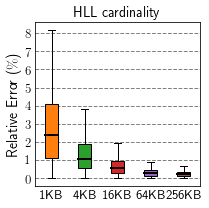

In [15]:
import importlib
import plot as csp
importlib.reload(csp)
csp.count_sketch_plot(data_list, "hll", ["1K", "4K", "16K", "64K", "256K"], ["C1", "C2", "C3", "C4", "C5"], (3, 3))


In [1]:
import os

from env_setting.env_module import pcap_storage_path
from env_setting.env_module import pcap_editor_path
from env_setting.env_module import result_sw_dp_path
from env_setting.env_module import result_gt_path
from env_setting.env_module import sw_dp_simulator_path
from env_setting.env_module import result_cp_path

# pcap iteration code
from data_helper.data_path_helper.pcap_path_helper import get_pcap_list_by_date_and_count
from data_helper.data_path_helper.pcap_path_helper import get_dat_list_by_date_and_count
from data_helper.data_path_helper.pcap_path_helper import get_test_pcap_list_count
from data_helper.data_path_helper.pcap_path_helper import get_test_dat_list_count

from python_lib.pkl_saver import PklSaver

# sketch_name = "univmon"
# sketch_name = "hll"
sketch_name = "cs"

# date = 20140320

# date = 20140619
date = 20180816
pcap_list = get_dat_list_by_date_and_count(date, "60s", 1)
# pcap_list = get_dat_list_by_date_and_count(date, "60s", 60)
# pcap_list = get_dat_list_by_date_and_count(date, "60s", 1)


# date = 100
# pcap_list = get_test_pcap_list_count("small.pcap")
# pcap_list = get_test_dat_list_count("small.dat")

lcount = 0

# epoch = 15
epoch = 60

from parallel_run_script.data_plane.SketchMD.configs.load import load_param_list

ret = load_param_list(sketch_name)
print(ret.keys())
epoch_list = ret["epoch_list"]
key_list = ret["key_list"]
width_list = ret["width_list"]
row_list = ret["row_list"]
level_list = ret["level_list"]
seed_list = ret["seed_list"]
cmd_list = []

data_list = []
for key, epoch, row, width, level in zip(key_list, epoch_list, row_list, width_list, level_list):
    print(key, epoch, row, width, level)
    error_list = []
    for (pcap_full_path, pcap_folder_path, pcap_file_name) in pcap_list:
        for seed in seed_list:
            str = "epoch_%02d_row_%d_width_%d_level_%d_seed_%d" % (epoch, row, width, level, seed)
            output_pkl_dir = os.path.join(result_cp_path, "SketchMD", sketch_name, pcap_file_name, key, str)
#             print(output_pkl_dir)
            saver = PklSaver(output_pkl_dir, "data.pkl")
            data = saver.load()
            print(data)
            error_list.append(data[0])
#             print(data[0][2])

    from statistics import median
    data_list.append(median(error_list))
#     print(median(error_list), len(error_list))


parallel_run_script.data_plane.SketchMD.configs.cs
dict_keys(['key_list', 'epoch_list', 'width_list', 'row_list', 'level_list', 'seed_list'])
srcIP,dstIP,srcPort,dstPort,proto 60 1 1024 1
[34.59593297840634]
[25.98155639928536]
[34.208013861322485]
[33.19904065825206]
[31.161394903758282]
srcIP,dstIP,srcPort,dstPort,proto 60 1 2048 1
[21.560929870287882]
[14.154803305129862]
[22.50057979802362]
[22.02390390147623]
[20.502146150163473]
srcIP,dstIP,srcPort,dstPort,proto 60 1 4096 1
[13.273272314690153]
[11.397625865501944]
[16.61059852777566]
[15.519734420269094]
[11.004600943725103]
srcIP,dstIP,srcPort,dstPort,proto 60 1 8192 1
[8.901538032931605]
[7.324793131795264]
[7.325706702317945]
[12.72380035052901]
[6.6481266862183706]
srcIP,dstIP,srcPort,dstPort,proto 60 1 16384 1
[5.797087003506862]
[4.124608107837932]
[5.472891788895746]
[5.737506100446718]
[5.61254414225455]
srcIP,dstIP,srcPort,dstPort,proto 60 3 1024 1
[22.49830253355174]
[20.836978895452265]
[20.856246448845415]
[25.171308

In [2]:
len(data_list)

25

In [3]:
import sys

for i in range(0, 5):
    for j in range(0, 5):
        sys.stdout.write("%.2f " % data_list[5*i+j])
    sys.stdout.write("\n")

33.20 21.56 13.27 7.33 5.61 
20.86 11.20 6.41 3.05 1.53 
16.50 8.53 4.44 1.93 0.96 
12.94 6.20 3.85 1.48 0.74 
10.87 5.69 3.17 1.32 0.67 
